In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np

# Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
z_dim = 100
epochs = 100
batch_size = 64
n_classes = 10

# Define preprocessing transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

# Create DataLoader for training and test sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [2]:
class Generator(nn.Module):
    def __init__(self, n_classes=10):
        super(Generator, self).__init__()
        self.embed = nn.Embedding(n_classes, z_dim)
        self.model = nn.Sequential(
            nn.Linear(z_dim * 2, 128),
            nn.LeakyReLU(0.01),
            nn.Linear(128, 784),
            nn.Tanh()
        )

    def forward(self, x, labels):
        labels = self.embed(labels)
        x = torch.cat([x, labels], 1)
        return self.model(x).view(x.size(0), 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self, n_classes=10):
        super(Discriminator, self).__init__()
        self.embed = nn.Embedding(n_classes, 784)
        self.model = nn.Sequential(
            nn.Linear(784 * 2, 128),
            nn.LeakyReLU(0.01),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x, labels):
        labels = self.embed(labels)
        x = torch.flatten(x, 1)
        x = torch.cat([x, labels], 1)
        return self.model(x)

# Instantiate models
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002)

def discriminator_loss(real_data, real_labels, fake_data, fake_labels):
    real_loss = criterion(discriminator(real_data, real_labels), torch.ones(real_data.size(0), 1).to(device))
    fake_loss = criterion(discriminator(fake_data, fake_labels), torch.zeros(fake_data.size(0), 1).to(device))
    return 0.5 * (real_loss + fake_loss)

def generator_loss(d_output, fake_labels):
    labels = torch.ones(d_output.size(0), 1).to(device)
    loss = criterion(d_output, labels)
    return loss

def show_generated_images(generator):
    with torch.no_grad():
        noise = torch.randn(16, z_dim).to(device)
        labels = torch.randint(0, n_classes, (16,)).to(device)
        fake_data = generator(noise, labels)
        fake_data = fake_data.view(fake_data.size(0), 28, 28)
        fake_data = (fake_data + 1) / 2

        fig, axs = plt.subplots(4, 4)
        cnt = 0
        for i in range(4):
            for j in range(4):
                axs[i, j].imshow(fake_data[cnt].cpu().detach().numpy(), cmap='gray')
                axs[i, j].axis('off')
                cnt += 1
        plt.show()


Epoch 0/100: Discriminator Loss: 0.47789984941482544, Generator Loss: 1.2764959335327148


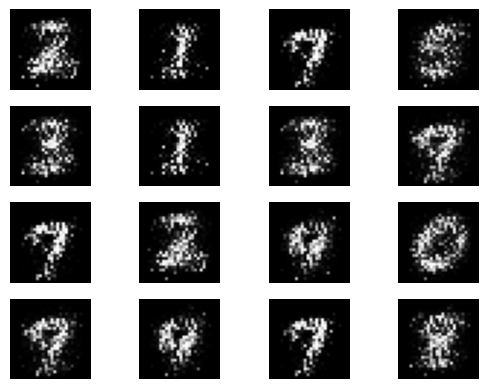

Epoch 1/100: Discriminator Loss: 0.5057402849197388, Generator Loss: 1.0814547538757324
Epoch 2/100: Discriminator Loss: 0.534407377243042, Generator Loss: 1.0014692544937134
Epoch 3/100: Discriminator Loss: 0.40449392795562744, Generator Loss: 1.525876522064209
Epoch 4/100: Discriminator Loss: 0.4584467113018036, Generator Loss: 1.567237377166748
Epoch 5/100: Discriminator Loss: 0.3512478470802307, Generator Loss: 1.9318963289260864
Epoch 6/100: Discriminator Loss: 0.4684904217720032, Generator Loss: 1.1761744022369385
Epoch 7/100: Discriminator Loss: 0.34512051939964294, Generator Loss: 1.5491299629211426
Epoch 8/100: Discriminator Loss: 0.35135751962661743, Generator Loss: 1.6027048826217651
Epoch 9/100: Discriminator Loss: 0.5826301574707031, Generator Loss: 1.037587285041809
Epoch 10/100: Discriminator Loss: 0.49298417568206787, Generator Loss: 1.143390417098999


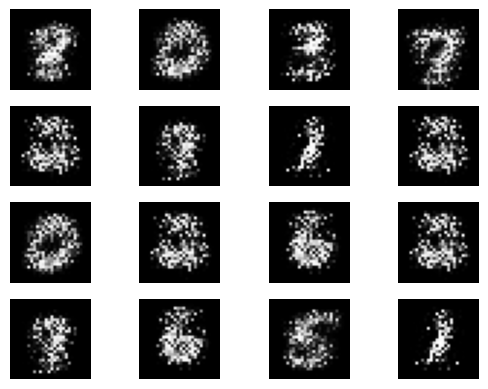

Epoch 11/100: Discriminator Loss: 0.5177607536315918, Generator Loss: 1.2653541564941406
Epoch 12/100: Discriminator Loss: 0.5558743476867676, Generator Loss: 1.2904835939407349
Epoch 13/100: Discriminator Loss: 0.4419218599796295, Generator Loss: 1.4583215713500977
Epoch 14/100: Discriminator Loss: 0.5557304620742798, Generator Loss: 1.4000000953674316
Epoch 15/100: Discriminator Loss: 0.6260170936584473, Generator Loss: 1.1874933242797852
Epoch 16/100: Discriminator Loss: 0.3502461016178131, Generator Loss: 1.6066237688064575
Epoch 17/100: Discriminator Loss: 0.5398440957069397, Generator Loss: 1.489375352859497
Epoch 18/100: Discriminator Loss: 0.7262343764305115, Generator Loss: 1.0228725671768188
Epoch 19/100: Discriminator Loss: 0.7221266627311707, Generator Loss: 1.1996405124664307
Epoch 20/100: Discriminator Loss: 0.6791393756866455, Generator Loss: 1.3578494787216187


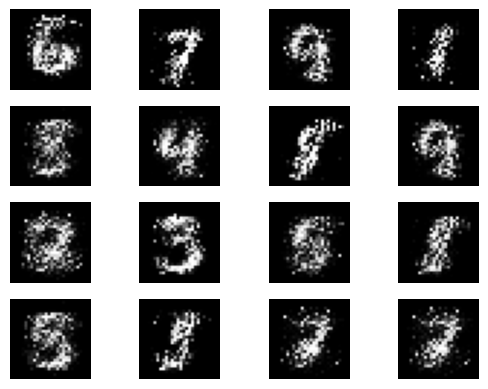

Epoch 21/100: Discriminator Loss: 0.41974130272865295, Generator Loss: 1.5756332874298096
Epoch 22/100: Discriminator Loss: 0.5922359824180603, Generator Loss: 1.4483405351638794
Epoch 23/100: Discriminator Loss: 0.3606914281845093, Generator Loss: 1.6840194463729858
Epoch 24/100: Discriminator Loss: 0.4830869436264038, Generator Loss: 1.7463562488555908
Epoch 25/100: Discriminator Loss: 0.46816304326057434, Generator Loss: 1.2228808403015137
Epoch 26/100: Discriminator Loss: 0.5886489152908325, Generator Loss: 1.3306090831756592
Epoch 27/100: Discriminator Loss: 0.5102800130844116, Generator Loss: 1.5260244607925415
Epoch 28/100: Discriminator Loss: 0.5297234058380127, Generator Loss: 1.933530569076538
Epoch 29/100: Discriminator Loss: 0.4909272789955139, Generator Loss: 1.3558704853057861
Epoch 30/100: Discriminator Loss: 0.42272844910621643, Generator Loss: 1.2846394777297974


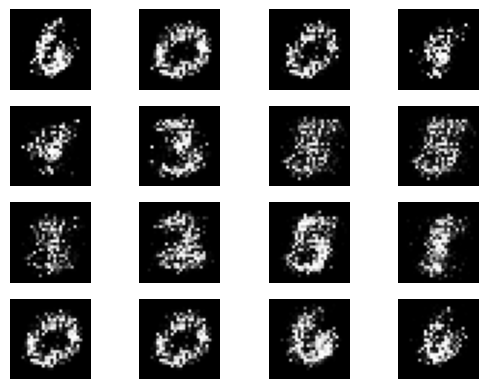

Epoch 31/100: Discriminator Loss: 0.5674445033073425, Generator Loss: 1.4523853063583374
Epoch 32/100: Discriminator Loss: 0.6148579120635986, Generator Loss: 1.1936043500900269
Epoch 33/100: Discriminator Loss: 0.47280052304267883, Generator Loss: 1.6086397171020508
Epoch 34/100: Discriminator Loss: 0.4813423752784729, Generator Loss: 0.968745768070221
Epoch 35/100: Discriminator Loss: 0.47025370597839355, Generator Loss: 1.2307589054107666
Epoch 36/100: Discriminator Loss: 0.5444608330726624, Generator Loss: 1.477332592010498
Epoch 37/100: Discriminator Loss: 0.7366001605987549, Generator Loss: 1.0866942405700684
Epoch 38/100: Discriminator Loss: 0.5496113300323486, Generator Loss: 1.1851171255111694
Epoch 39/100: Discriminator Loss: 0.6176741123199463, Generator Loss: 1.477461576461792
Epoch 40/100: Discriminator Loss: 0.5088187456130981, Generator Loss: 1.2936819791793823


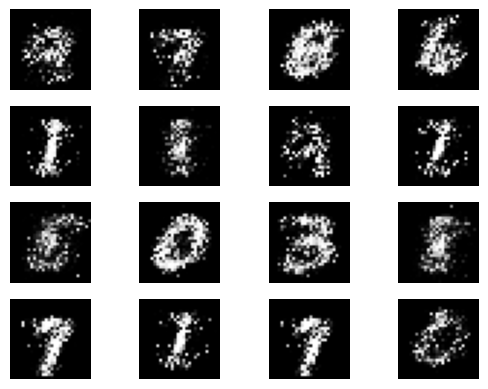

Epoch 41/100: Discriminator Loss: 0.6441574096679688, Generator Loss: 1.1060872077941895
Epoch 42/100: Discriminator Loss: 0.42777326703071594, Generator Loss: 1.4734212160110474
Epoch 43/100: Discriminator Loss: 0.595245361328125, Generator Loss: 1.141493797302246
Epoch 44/100: Discriminator Loss: 0.7878953218460083, Generator Loss: 1.078181266784668
Epoch 45/100: Discriminator Loss: 0.5665361881256104, Generator Loss: 0.9480865001678467
Epoch 46/100: Discriminator Loss: 0.6040720343589783, Generator Loss: 1.1435418128967285
Epoch 47/100: Discriminator Loss: 0.6552541255950928, Generator Loss: 1.2242077589035034
Epoch 48/100: Discriminator Loss: 0.5924274921417236, Generator Loss: 1.0200039148330688
Epoch 49/100: Discriminator Loss: 0.5588265657424927, Generator Loss: 1.3731698989868164
Epoch 50/100: Discriminator Loss: 0.5430715680122375, Generator Loss: 1.2465591430664062


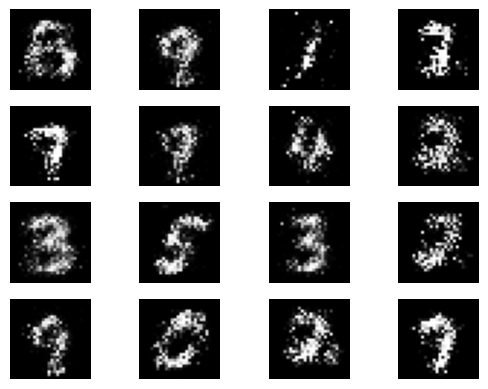

Epoch 51/100: Discriminator Loss: 0.7935736179351807, Generator Loss: 0.8113840818405151
Epoch 52/100: Discriminator Loss: 0.7768010497093201, Generator Loss: 0.9292122721672058
Epoch 53/100: Discriminator Loss: 0.6693704128265381, Generator Loss: 0.7975672483444214
Epoch 54/100: Discriminator Loss: 0.5396347045898438, Generator Loss: 1.2286206483840942
Epoch 55/100: Discriminator Loss: 0.6326901912689209, Generator Loss: 1.008302092552185
Epoch 56/100: Discriminator Loss: 0.7234978079795837, Generator Loss: 1.0598268508911133
Epoch 57/100: Discriminator Loss: 0.5909115076065063, Generator Loss: 0.9313121438026428
Epoch 58/100: Discriminator Loss: 0.5881770253181458, Generator Loss: 0.9607016444206238
Epoch 59/100: Discriminator Loss: 0.5162878036499023, Generator Loss: 1.0516347885131836
Epoch 60/100: Discriminator Loss: 0.5659770965576172, Generator Loss: 0.9902468919754028


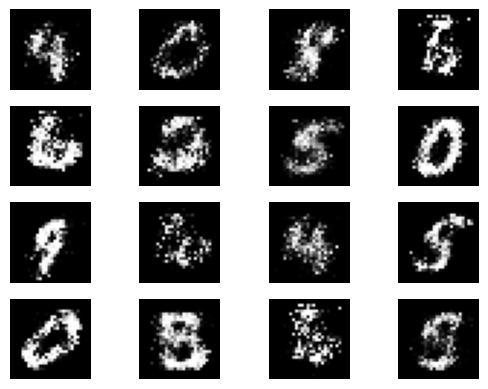

Epoch 61/100: Discriminator Loss: 0.6718571186065674, Generator Loss: 0.8753637075424194
Epoch 62/100: Discriminator Loss: 0.5595672130584717, Generator Loss: 0.8769086599349976
Epoch 63/100: Discriminator Loss: 0.7544856071472168, Generator Loss: 0.9154170751571655
Epoch 64/100: Discriminator Loss: 0.47172611951828003, Generator Loss: 1.0764992237091064
Epoch 65/100: Discriminator Loss: 0.5867292881011963, Generator Loss: 1.0711147785186768
Epoch 66/100: Discriminator Loss: 0.5183110237121582, Generator Loss: 1.3316237926483154
Epoch 67/100: Discriminator Loss: 0.579688310623169, Generator Loss: 0.9538083076477051
Epoch 68/100: Discriminator Loss: 0.5190159678459167, Generator Loss: 1.1103625297546387
Epoch 69/100: Discriminator Loss: 0.6107925176620483, Generator Loss: 1.1129953861236572
Epoch 70/100: Discriminator Loss: 0.5121496915817261, Generator Loss: 0.9908237457275391


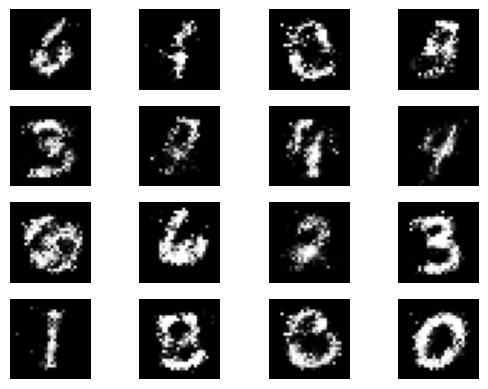

Epoch 71/100: Discriminator Loss: 0.5678627490997314, Generator Loss: 1.0525829792022705
Epoch 72/100: Discriminator Loss: 0.6724624633789062, Generator Loss: 0.9433944225311279
Epoch 73/100: Discriminator Loss: 0.5068107843399048, Generator Loss: 1.2496379613876343
Epoch 74/100: Discriminator Loss: 0.5644041299819946, Generator Loss: 1.2234517335891724
Epoch 75/100: Discriminator Loss: 0.6486614942550659, Generator Loss: 1.0803223848342896
Epoch 76/100: Discriminator Loss: 0.6192485690116882, Generator Loss: 0.932476818561554
Epoch 77/100: Discriminator Loss: 0.5277972221374512, Generator Loss: 1.176105260848999
Epoch 78/100: Discriminator Loss: 0.6190636157989502, Generator Loss: 1.0922898054122925
Epoch 79/100: Discriminator Loss: 0.5065782070159912, Generator Loss: 1.1006883382797241
Epoch 80/100: Discriminator Loss: 0.6009548306465149, Generator Loss: 1.2489393949508667


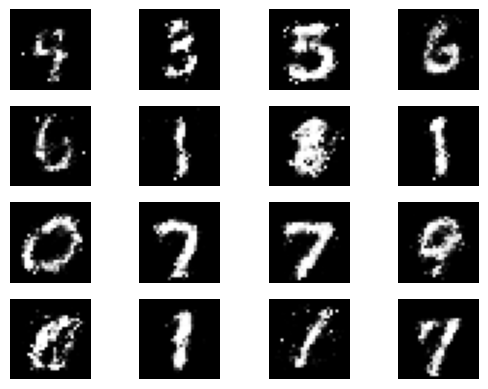

Epoch 81/100: Discriminator Loss: 0.5604673624038696, Generator Loss: 1.2148563861846924
Epoch 82/100: Discriminator Loss: 0.5767747163772583, Generator Loss: 1.1503037214279175
Epoch 83/100: Discriminator Loss: 0.5221066474914551, Generator Loss: 1.1199407577514648
Epoch 84/100: Discriminator Loss: 0.5178739428520203, Generator Loss: 1.1410980224609375
Epoch 85/100: Discriminator Loss: 0.46969980001449585, Generator Loss: 1.0749320983886719
Epoch 86/100: Discriminator Loss: 0.6321729421615601, Generator Loss: 0.8605176210403442
Epoch 87/100: Discriminator Loss: 0.4887724220752716, Generator Loss: 1.1516536474227905
Epoch 88/100: Discriminator Loss: 0.6589850187301636, Generator Loss: 1.1238949298858643
Epoch 89/100: Discriminator Loss: 0.5139226317405701, Generator Loss: 1.008886694908142
Epoch 90/100: Discriminator Loss: 0.5525632500648499, Generator Loss: 1.1527211666107178


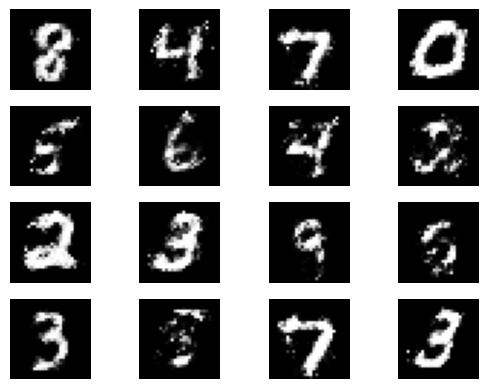

Epoch 91/100: Discriminator Loss: 0.4428979158401489, Generator Loss: 1.0817269086837769
Epoch 92/100: Discriminator Loss: 0.5383034944534302, Generator Loss: 0.9947293996810913
Epoch 93/100: Discriminator Loss: 0.5151259899139404, Generator Loss: 1.1320525407791138
Epoch 94/100: Discriminator Loss: 0.5101221799850464, Generator Loss: 1.3254280090332031
Epoch 95/100: Discriminator Loss: 0.6412373185157776, Generator Loss: 0.9730949401855469
Epoch 96/100: Discriminator Loss: 0.5662922859191895, Generator Loss: 1.324434518814087
Epoch 97/100: Discriminator Loss: 0.6035259962081909, Generator Loss: 1.3388441801071167
Epoch 98/100: Discriminator Loss: 0.4763174057006836, Generator Loss: 1.3326574563980103
Epoch 99/100: Discriminator Loss: 0.5824018716812134, Generator Loss: 0.9502190351486206


In [4]:
# Training loop (update to include class labels)
for epoch in range(epochs):
    for real_data, real_labels in train_loader:
        real_data, real_labels = real_data.to(device), real_labels.to(device)
        
        # Train Discriminator
        noise = torch.randn(batch_size, z_dim).to(device)
        fake_labels = torch.randint(0, n_classes, (batch_size,)).to(device)
        fake_data = generator(noise, fake_labels)
        d_loss = discriminator_loss(real_data, real_labels, fake_data, fake_labels)
        optimizer_d.zero_grad()
        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        noise = torch.randn(batch_size, z_dim).to(device)
        fake_labels = torch.randint(0, n_classes, (batch_size,)).to(device)
        fake_data = generator(noise, fake_labels)
        g_loss = generator_loss(discriminator(fake_data, fake_labels), fake_labels)
        optimizer_g.zero_grad()
        g_loss.backward()
        optimizer_g.step()

    print(f"Epoch {epoch}/{epochs}: Discriminator Loss: {d_loss.item()}, Generator Loss: {g_loss.item()}")
    if epoch % 10 == 0:
        show_generated_images(generator)

In [6]:
# Number of synthetic samples to generate per class
n_synthetic_samples_per_class = 100

# Generate synthetic images using the trained generator
synthetic_images = []
synthetic_labels = []
with torch.no_grad():
    for class_label in range(10): # Iterate through each class
        noise = torch.randn(n_synthetic_samples_per_class, z_dim).to(device)
        labels = torch.full((n_synthetic_samples_per_class,), class_label, dtype=torch.long).to(device)
        fake_data = generator(noise, labels)
        synthetic_images.append(fake_data.cpu())
        synthetic_labels.extend([class_label] * n_synthetic_samples_per_class)

synthetic_images = torch.cat(synthetic_images)
synthetic_labels = torch.tensor(synthetic_labels, dtype=torch.long)

# Combine synthetic and real datasets
augmented_data = torch.cat([train_dataset.data.view(-1, 1, 28, 28).float(), synthetic_images]) / 255.0 * 2.0 - 1.0
augmented_labels = torch.cat([train_dataset.targets, synthetic_labels])

# Create DataLoader for augmented dataset
augmented_dataset = torch.utils.data.TensorDataset(augmented_data, augmented_labels)
augmented_loader = DataLoader(augmented_dataset, batch_size=batch_size, shuffle=True)

# Define a simpler CNN model for MNIST classification
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 16, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Flatten(),
            nn.Linear(32 * 5 * 5, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

# Function to train and evaluate the model
def train_and_evaluate_model(loader, test_loader, title, epochs=epochs):
    model = CNNModel().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        model.train()
        for data, labels in loader:
            data, labels = data.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for data, labels in test_loader:
                data, labels = data.to(device), labels.to(device)
                outputs = model(data)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f"Accuracy of the model on {title}: {accuracy:.2f}%")

# Train and evaluate the model on the augmented dataset
train_and_evaluate_model(augmented_loader, test_loader, "augmented dataset", epochs=10)


Accuracy of the model on augmented dataset: 98.21%
Accuracy of the model on augmented dataset: 98.67%
Accuracy of the model on augmented dataset: 98.84%
Accuracy of the model on augmented dataset: 98.98%
Accuracy of the model on augmented dataset: 99.01%
Accuracy of the model on augmented dataset: 98.95%
Accuracy of the model on augmented dataset: 99.04%
Accuracy of the model on augmented dataset: 99.02%
Accuracy of the model on augmented dataset: 99.12%
Accuracy of the model on augmented dataset: 99.09%


In [8]:
# Train and evaluate the model on the original dataset
train_and_evaluate_model(train_loader, test_loader, "original dataset", epochs=10)

Accuracy of the model on original dataset: 97.60%
Accuracy of the model on original dataset: 98.57%
Accuracy of the model on original dataset: 98.70%
Accuracy of the model on original dataset: 98.49%
Accuracy of the model on original dataset: 99.04%
Accuracy of the model on original dataset: 98.88%
Accuracy of the model on original dataset: 99.00%
Accuracy of the model on original dataset: 98.97%
Accuracy of the model on original dataset: 98.74%
Accuracy of the model on original dataset: 98.94%
